# Image Plotting

This week, we will do just a very short bit of image plotting.  We'll be using a Koala scan.

In [1]:
%matplotlib inline

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
plt.rcParams["figure.figsize"] = (12, 10)

We're going to load the data in using h5py from an hdf5 file.  HDF5 is a file format that allows for very simple storage of numerical data; in this particular case, we'll be loading in a 3D array, and then examining it.

In [3]:
f = h5py.File("/srv/nbgrader/data/koala.hdf5", "r")
print(list(f.keys()))

['koala']


Here, we load in the data by reading from the key `koala` that we just found.

In [4]:
koala = f["/koala"][:]
print(koala.shape)

(200, 512, 512)


We'll use subplots to show the maximum value along each of the three axes, along with a histogram of all the values.  The `.max()` function here accepts and `axis` argument, which means "max along a given axis."

(array([  4.29380940e+07,   1.22806000e+06,   1.66719000e+05,
          1.24188000e+05,   1.14675000e+05,   1.19270000e+05,
          1.76270000e+05,   4.37886000e+05,   4.79859700e+06,
          9.02072000e+05,   2.74858000e+05,   1.41428000e+05,
          1.27136000e+05,   1.18077000e+05,   1.09754000e+05,
          1.03324000e+05,   9.99860000e+04,   9.22780000e+04,
          8.15670000e+04,   6.90870000e+04,   5.89230000e+04,
          4.77050000e+04,   3.58190000e+04,   2.63950000e+04,
          1.73860000e+04,   9.71200000e+03,   5.03700000e+03,
          2.46000000e+03,   1.09300000e+03,   5.33000000e+02,
          3.12000000e+02,   9.90000000e+01]),
 array([    0.  ,   126.75,   253.5 ,   380.25,   507.  ,   633.75,
          760.5 ,   887.25,  1014.  ,  1140.75,  1267.5 ,  1394.25,
         1521.  ,  1647.75,  1774.5 ,  1901.25,  2028.  ,  2154.75,
         2281.5 ,  2408.25,  2535.  ,  2661.75,  2788.5 ,  2915.25,
         3042.  ,  3168.75,  3295.5 ,  3422.25,  3549.  ,  367

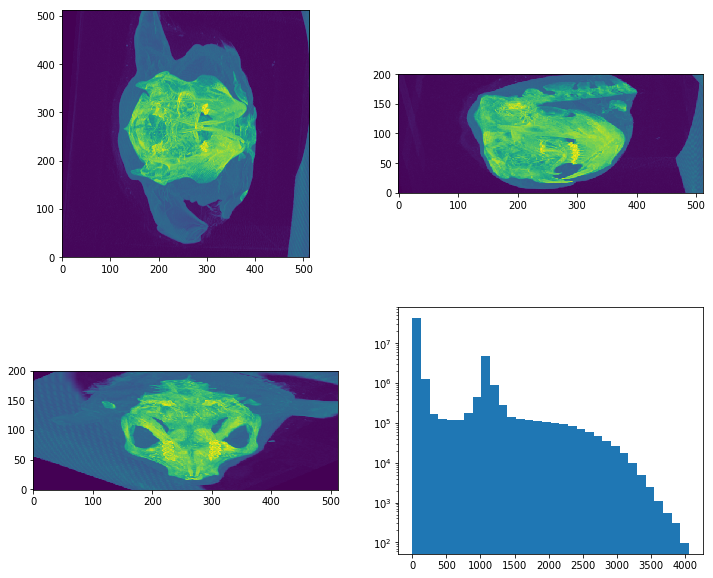

In [5]:
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.imshow(koala.max(axis=i), interpolation='nearest', origin='lower', cmap='viridis')
plt.subplot(2,2,4)
plt.hist(koala.ravel(), bins = 32, log = True)

We'll make a slicer, too -- this one is along the x value.  Note how we take a floating point value and turn that into an index to make the image.

In [6]:
def xslicer(coord = 0.5):
    # We're accepting a float here, so we convert that into the right index we want
    ind = int(coord * koala.shape[0])
    plt.imshow(koala[ind,:,:], interpolation = 'nearest', origin='lower')

<function __main__.xslicer>

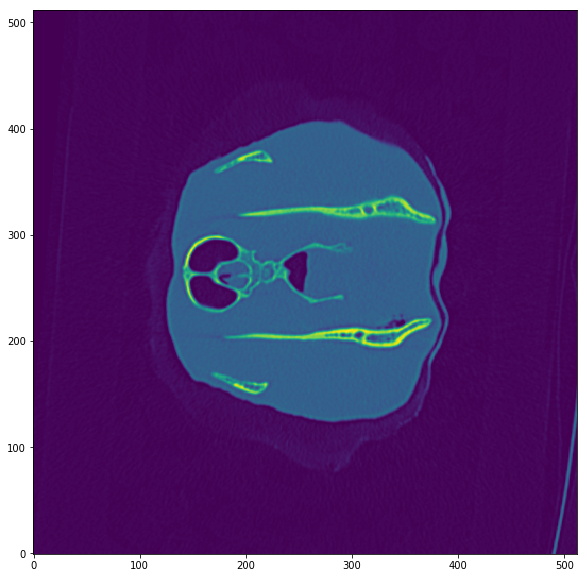

In [7]:
ipywidgets.interact(xslicer, coord = (0.0, 1.0, 0.01))